# **CUSTOMER SEGMENTATION**

### Methodology
Using a dataset that contains sales orders in a period of time, we will use Python to obtain the frequency, recency and monetary values in the withnessed period. Later with those values we will give `R, F, and M scores` to each customer, that will allow us to cluster them in different segments. Also skew distribution will be applied for imblanced distributions.

- Recency will be the `minimum of 'days_since_last_purchase'` for each customer.
- Frequency will be the `total number of order`s in the period for each customer.
- Monetary, will be the `total value of the purchases` in the period for each customer.


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import timedelta, datetime

pd.options.display.max_rows = 4000
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision=5)

import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('E:\learn st new\FRM analysis\data.csv')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.550,17850.000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.750,17850.000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.390,17850.000,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.650,17850.000,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.250,17850.000,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.850,17850.000,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.850,17850.000,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.690,13047.000,United Kingdom


### Thống kê mô tả

In [31]:
#Thống kê mô tả
df.describe(include = [np.object])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [32]:
# Tỉ lệ khuyết thiếu mỗi items
100* df.isnull().sum()/df.shape[0]

InvoiceNo      0.000
StockCode      0.000
Description    0.268
Quantity       0.000
InvoiceDate    0.000
UnitPrice      0.000
CustomerID    24.927
Country        0.000
dtype: float64

In [33]:
# Do các dữ liệu NaN không nằm trong các dữ liệu quan trọng, nên có thể loại bỏ tất cả các dữ liệu NaN
df = df.dropna(axis = 0, how = 'any')

In [240]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%Y-%m-%d")
df['InvoiceYear'] = pd.to_datetime(df['InvoiceDate']).dt.year

In [151]:
df['Quantity'] = np.abs(df['Quantity'])
df['UnitPrice'] = np.abs(df['UnitPrice'])
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [209]:
revenue_by_country_peryear = df.groupby(['InvoiceYear', 'Country'], as_index= False).Revenue.sum().sort_values(by = ['InvoiceYear','Revenue'], ascending= [True, False])

In [228]:
revenue_2010 = revenue_by_country_peryear[revenue_by_country_peryear['InvoiceYear']== 2010].head(10)
revenue_2011 = revenue_by_country_peryear[revenue_by_country_peryear['InvoiceYear']== 2011].head(10)

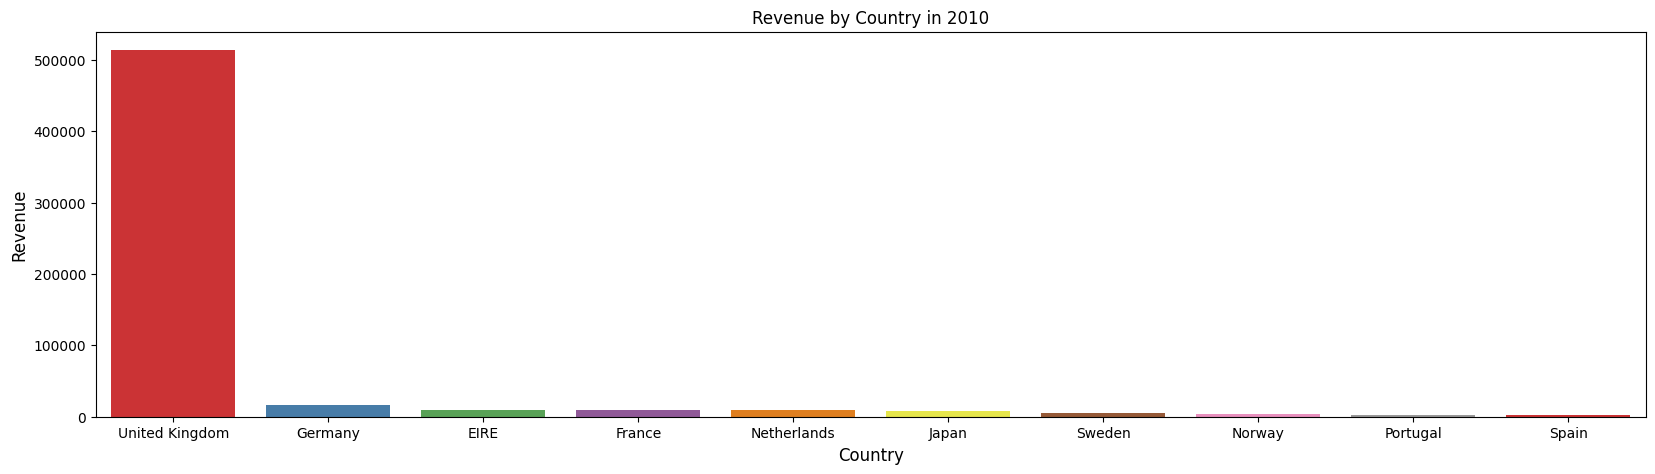

In [227]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Country', y= 'Revenue',data = revenue_2010 , palette = 'Set1')
plt.title('Revenue by Country in 2010', fontsize= 12)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Revenue', fontsize= 12)
pass

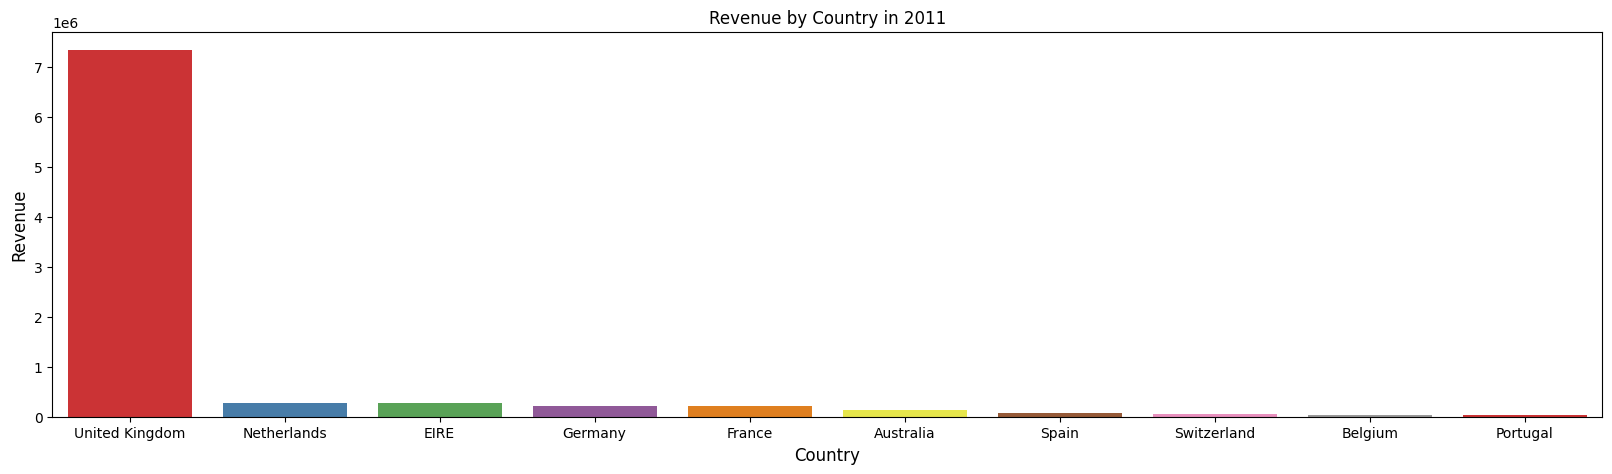

In [232]:
plt.figure(figsize = (20,5))
sns.barplot(x = 'Country', y= 'Revenue',data = revenue_2011 , palette = 'Set1')
plt.title('Revenue by Country in 2011', fontsize= 12)
plt.xlabel('Country', fontsize = 12)
plt.ylabel('Revenue', fontsize= 12)
pass

Nhận xét:
- Doanh số của UK là lớn nhất trong 2 năm quan sát, các nước khác trong top 10 doanh số theo năm có đóng góp không đáng kể so với UK
- EIRE có mức đóng góp ở mức số 3, ổn định trong 2 năm.
- Netherlands tăng vọt doanh số hàng bán để chiếm vị trí thứ 2 của Đức.

In [233]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.550,17850.000,United Kingdom,2010,15.300
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.390,17850.000,United Kingdom,2010,20.340
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.750,17850.000,United Kingdom,2010,22.000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.390,17850.000,United Kingdom,2010,20.340
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.390,17850.000,United Kingdom,2010,20.340


In [246]:
unit_sold_per_months = df.set_index('InvoiceDate').to_period('M')

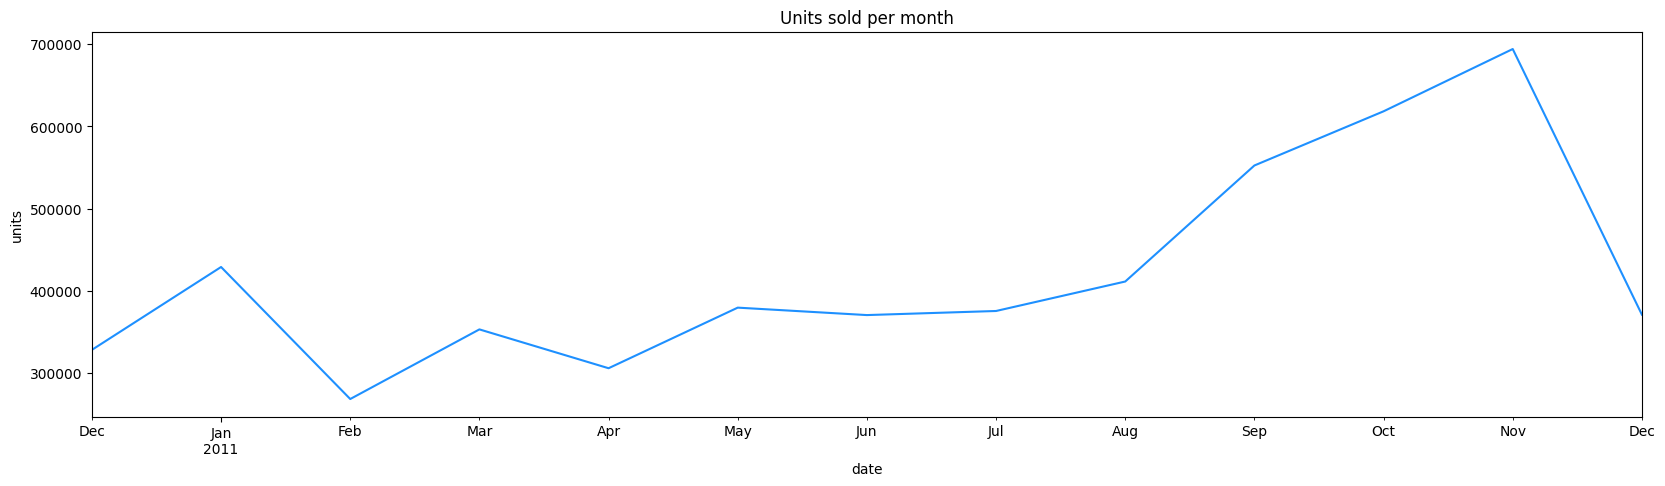

In [248]:
plt.figure(figsize = (10,10))
unit_sold_per_months['Quantity'].groupby('InvoiceDate').agg(sum).plot(figsize=(20,5), c='dodgerblue')
plt.title('Units sold per month')
plt.ylabel('units')
plt.xlabel('Date')
pass

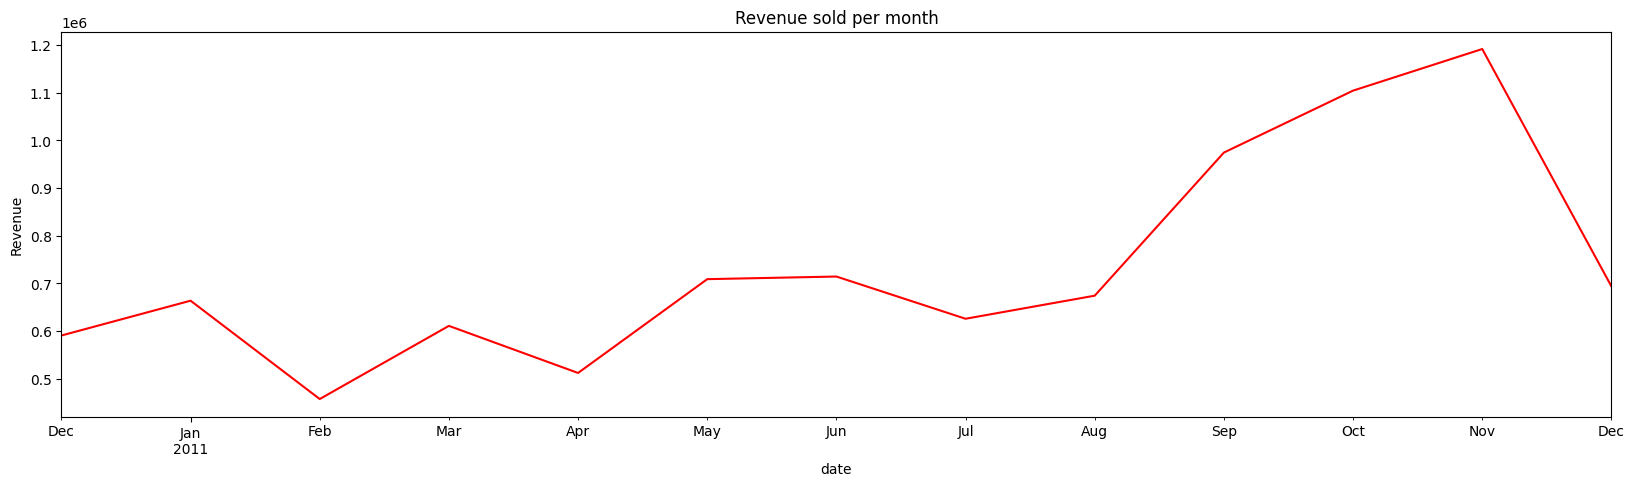

In [249]:
plt.figure(figsize = (10,10))
unit_sold_per_months['Revenue'].groupby('InvoiceDate').agg(sum).plot(figsize=(20,5), c='r')
plt.title('Revenue sold per month')
plt.ylabel('Revenue')
plt.xlabel('date')
pass

Nhận xét: 
- Biểu đồ Lượng hàng hóa và doanh số bán hàng khá giống nhau
- Doanh số và lượng bán vào tháng 11 là cao nhất, và chạm đáy vào tháng 2 năm sau

In [251]:
NOW = df['InvoiceDate'].max()+ timedelta(days=1)
df['Days_since_last_purchase'] = df['InvoiceDate'].apply(lambda x: (NOW -x).days)

In [253]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,Revenue,Days_since_last_purchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.550,17850.000,United Kingdom,2010,15.300,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.390,17850.000,United Kingdom,2010,20.340,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.750,17850.000,United Kingdom,2010,22.000,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.390,17850.000,United Kingdom,2010,20.340,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.390,17850.000,United Kingdom,2010,20.340,374


In [264]:
df_customers = df.groupby(['CustomerID','Country']).agg(
    {'Days_since_last_purchase': lambda x: x.min(),
     'InvoiceNo':'count',
     'Revenue':'sum'
     }).reset_index()
df_customers.head()

,CustomerID,Country,Days_since_last_purchase,InvoiceNo,Revenue
0,12346.000,United Kingdom,326,2,154367.200
1,12347.000,Iceland,3,182,4310.000
2,12348.000,Finland,76,31,1797.240
3,12349.000,Italy,19,73,1757.550
4,12350.000,Norway,311,17,334.400


In [268]:
df_customers = df_customers.rename(columns = {'Days_since_last_purchase':'Recency', 'InvoiceNo': 'Frequency', 'Revenue':'Monetary'})

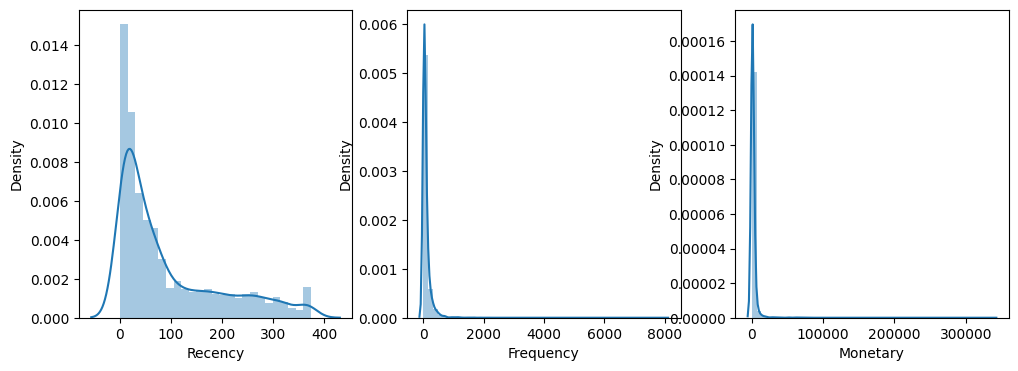

In [271]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.distplot(df_customers['Recency'], ax = ax[0])
sns.distplot(df_customers['Frequency'], ax = ax[1])
sns.distplot(df_customers['Monetary'], ax = ax[2])
plt.show()

In [284]:
# Do phân phối dữ liệu bị lệch nên cần phải skew lại
from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

In [286]:
df_customers['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers['Monetary'] = pd.Series(np.cbrt(df_customers['Monetary'])).values
df_customers.head()

,CustomerID,Country,Recency,Frequency,Monetary
0,12346.000,United Kingdom,9.336,0.707,53.644
1,12347.000,Iceland,1.197,6.052,16.274
2,12348.000,Finland,6.157,3.791,12.158
3,12349.000,Italy,3.725,4.857,12.068
4,12350.000,Norway,9.222,3.073,6.941


In [287]:
#Mưcs phân vị
quintiles = df_customers[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()
quintiles

{'Recency': {0.2: 3.0271180226200567,
  0.4: 4.579306883944296,
  0.6: 6.051976142142044,
  0.8: 7.9529518269104225},
 'Frequency': {0.2: 2.846498353296285,
  0.4: 3.709828352682194,
  0.6: 4.56530360343732,
  0.8: 5.542494197164318},
 'Monetary': {0.2: 6.2879082758279345,
  0.4: 7.914751050811494,
  0.6: 9.853957468262205,
  0.8: 12.788906372918413}}

In [292]:
#Hàm tính điểm frm dựa trên mức phân vị 
def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1
    
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [293]:
df_customers['r'] = df_customers['Recency'].apply(lambda x: r_score(x))
df_customers['f'] = df_customers['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
df_customers['m'] = df_customers['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [295]:
df_customers['rfm_score'] = df_customers['r'].map(str) + df_customers['f'].map(str) +df_customers['m'].map(str)

,CustomerID,Country,Recency,Frequency,Monetary,r,f,m,rfm_score
0,12346.000,United Kingdom,9.336,0.707,53.644,1,1,5,115
1,12347.000,Iceland,1.197,6.052,16.274,5,5,5,555
2,12348.000,Finland,6.157,3.791,12.158,2,3,4,234
3,12349.000,Italy,3.725,4.857,12.068,4,4,4,444
4,12350.000,Norway,9.222,3.073,6.941,1,2,2,122
5,12352.000,Norway,4.830,5.195,15.135,3,4,5,345
6,12353.000,Bahrain,8.245,1.442,4.465,1,1,1,111
7,12354.000,Spain,8.539,4.565,10.258,1,3,4,134
8,12355.000,Bahrain,8.354,2.761,7.716,1,1,2,112
9,12356.000,Portugal,4.030,4.587,14.114,4,4,5,445


In [296]:
import math
def truncate(x):
    return math.trunc(x)
df_customers['fm'] = ((df_customers['f'] + df_customers['m'])/2).apply(lambda x: truncate(x))

In [298]:
df_customers.head(20)

,CustomerID,Country,Recency,Frequency,Monetary,r,f,m,rfm_score,fm
0,12346.000,United Kingdom,9.336,0.707,53.644,1,1,5,115,3
1,12347.000,Iceland,1.197,6.052,16.274,5,5,5,555,5
2,12348.000,Finland,6.157,3.791,12.158,2,3,4,234,3
3,12349.000,Italy,3.725,4.857,12.068,4,4,4,444,4
4,12350.000,Norway,9.222,3.073,6.941,1,2,2,122,2
5,12352.000,Norway,4.830,5.195,15.135,3,4,5,345,4
6,12353.000,Bahrain,8.245,1.442,4.465,1,1,1,111,1
7,12354.000,Spain,8.539,4.565,10.258,1,3,4,134,3
8,12355.000,Bahrain,8.354,2.761,7.716,1,1,2,112,1
9,12356.000,Portugal,4.030,4.587,14.114,4,4,5,445,4


Đánh giá dựa trên mức phân vị :

- Khách hàng có fm = 5 là người thường xuyên mua hàng và mua với s`ố lượng lớn và giá trị cao -> rất cao`
- Khách hàng có fm = 4 là người có tần suất mua hàng nằm trong mức phân vị thứ 4 với giá trị mua hàng `ko quá outstanding`
- Khách hàng có fm = 3 là người có tần suất mua hàng thuộc nhóm mua với `giá trị rất lớn và ít`, hoặc `mua thường xuyên nhưng giá trị hàng hóa ở mức trung bình`
- Khách hàng có fm = 2 là người có tần suất `mua hàng ít` với `giá trị trung bình thấp`
- Khách hàng có fm = 1 hầu hết các điểm đều được rating 1 nên đây là `khách vãng lai`

In [301]:
# Đưa dữ liệu vô kmeans
df_kmeans = df_customers[['Recency', 'Frequency', 'Monetary']]

In [302]:
# Tien hanh scale du lieu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_kmeans)

df_kmeans_scale = scaler.transform(df_kmeans)

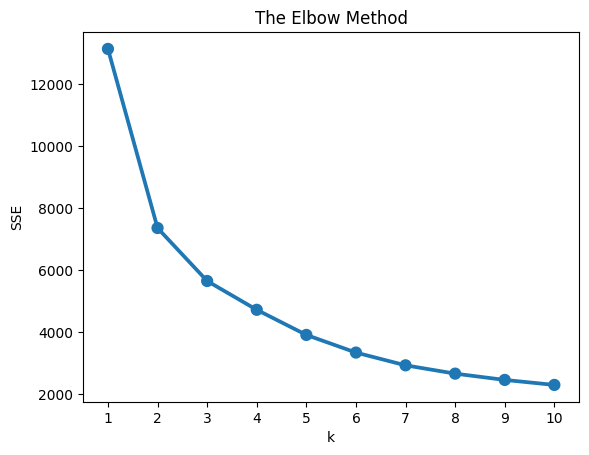

In [304]:
# Chọn số cụm bằng Elbow method
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state= 50)
    kmeans.fit(df_kmeans_scale)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [306]:
# Kiểm tra với nếu lấy số cụm là 5, phân tích FRM và Kmeans có sự khác biệt lớn ko
model = KMeans(n_clusters= 5, random_state=50)
model.fit(df_kmeans_scale)

KMeans(n_clusters=5, random_state=50)

In [309]:
df_customers['Cluster'] = model.labels_
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,6.020,4.870,10.550
1,3.820,3.450,7.680
2,8.090,2.630,6.540
3,2.690,6.080,14.880
4,2.180,6.900,35.720
